In [63]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb 

In [64]:
data = pd.read_csv("Algerian_forest_fires_cleaned.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [65]:
#checking the missing values
data.isna().sum()


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [66]:
data.duplicated().sum()

0

In [67]:
#to find out the no.of categories in classes column
data['Classes'].value_counts()
data['Classes'].value_counts().count()

8

In [68]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [69]:
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [70]:
#cleaning
data['Classes']=np.where(data['Classes'].str.contains('not fire'),0,1)

In [71]:
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [76]:
#for the correlation between columns 
corr_matrix = data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].corr()

<Axes: >

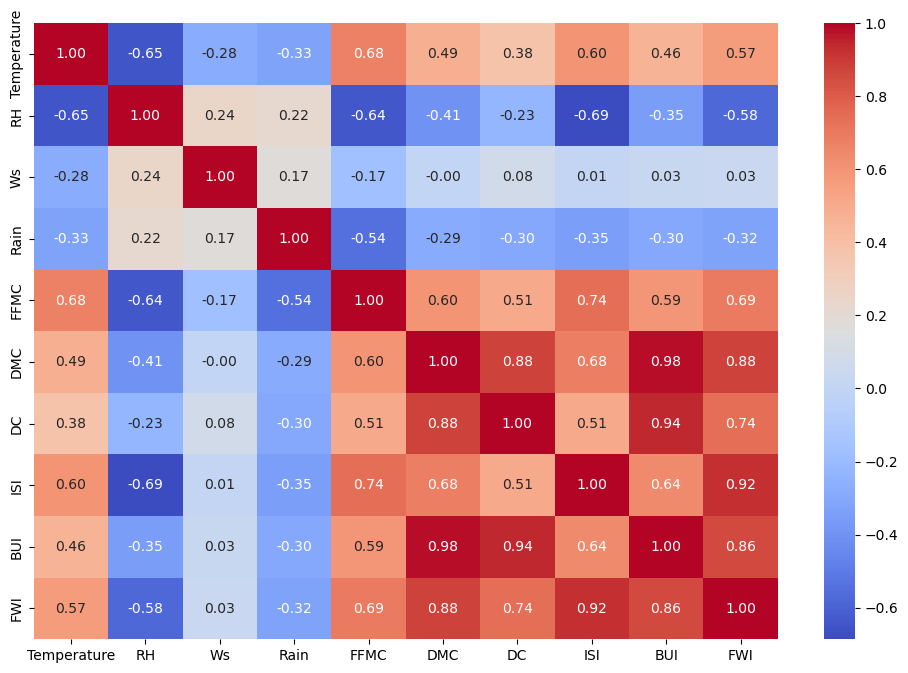

In [78]:
plt.figure(figsize=(12, 8))  
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

In [82]:
X = data[['Temperature',  'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',  'Classes']]
y=data['FWI']


In [81]:
from sklearn.model_selection import train_test_split 

In [88]:
X_test,X_train, y_test, y_train = train_test_split(X,y, train_size=0.2, random_state = 42) 

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_train_sc

array([[-0.34969583, -0.16963419,  0.59734144, ...,  0.17931845,
         0.13695365,  0.86991767],
       [ 0.20924423, -0.87343564,  0.70212876, ...,  0.34174026,
        -0.39145309,  0.86991767],
       [-1.18810592,  0.88606798, -1.00939741, ..., -0.8648218 ,
        -0.9341411 , -1.14953407],
       ...,
       [-0.62916586, -0.16963419, -0.4086168 , ..., -0.81841557,
        -0.39145309, -1.14953407],
       [ 2.72447449, -2.28103854,  1.2470228 , ...,  2.49963011,
         1.00097009,  0.86991767],
       [-0.62916586, -0.52153492,  0.07340486, ..., -0.65599375,
        -0.69850025, -1.14953407]])

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


#Fitting the Multiple Linear Regression model
lr = LinearRegression().fit(X_train, y_train)

#Predicting the Test and Train set result 
y_pred= lr.predict(X_test)  
x_pred= lr.predict(X_train) 

In [98]:
lr.intercept_

0.5987006607902172

In [99]:
lr.coef_

array([ 0.02655436,  0.01730123, -0.06273795, -0.01280272, -0.01332251,
        1.12994273,  0.31948606,  0.71962023])

In [103]:
y_pred = lr.predict(X_test_sc)

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [104]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [105]:
print("mse: ", mean_squared_error(y_test, y_pred))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

mse:  52.6579082682083
mae:  5.763799339209783
r2:  -0.35827661318763004


In [106]:
score = r2_score(y_test, y_pred)

In [107]:
r2_adjusted = 1-((1-score)*(len(y)-1))/(len(y)-X.shape[1]-1)
r2_adjusted

-0.40471342047609604

In [108]:
import pickle 

In [117]:
pickle.dump(scaler, open("scaler_assignment.pkl", "wb"))
pickle.dump(lr, open("regression_assignment.pkl", "wb"))

In [119]:
#opening pickle file
model_regressor=pickle.load(open("regression_assignment.pkl", "rb"))
model_scaler=pickle.load(open("scaler_assignment.pkl", "rb"))

In [123]:
X_new = pd.DataFrame({'Temperature':[27,29,30,34,35],
                     'Ws':[22,13,16,18,20],
                     'FFMC':[28,35.5,45.5,78.5,88.6],
                     'DMC':[0.7,65,7.8,8.9,35.4],
                     'DC':[6.9,88.5,220,100,68],
                     'ISI':[1.5,1.7,2.5,2.9,2.5], 
                     'BUI':[37.856,35.889,37.4,37.56,38],
                     'Classes':[0,1,1,1,0]})

In [124]:
X_new_sc=model_scaler.transform(X_new)

In [125]:
y_new_predict=model_regressor.predict(X_new_sc)
y_new_predict

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.36188168,  0.94375198,  1.25816512,  1.32508523, -0.29029895])